<a href="https://colab.research.google.com/github/shahabas9/Deep_learning_basics/blob/main/CNN_practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2

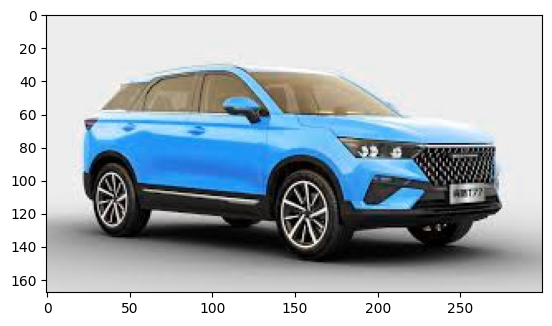

In [2]:
read_image=cv2.imread("cars.jpeg")
plt.imshow(read_image)
plt.show()

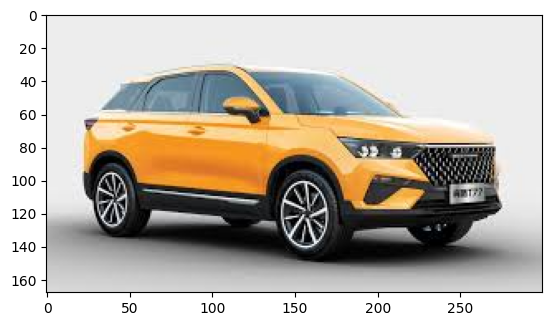

In [3]:
color_image=cv2.cvtColor(read_image,cv2.COLOR_BGR2RGB)
plt.imshow(color_image)
plt.show()

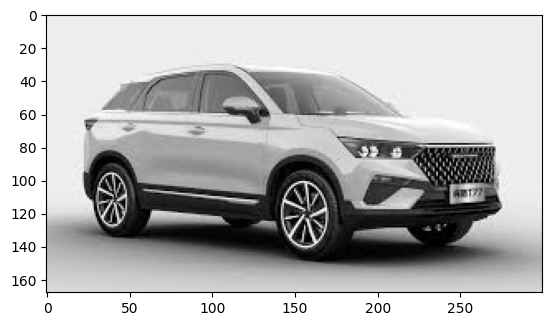

In [4]:
gray_image=cv2.cvtColor(read_image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap="gray")
plt.show()

In [5]:
gray_image.shape

(168, 300)

In [6]:
read_image.shape

(168, 300, 3)

In [7]:
color_image.shape

(168, 300, 3)

In [8]:
car=gray_image.reshape((1,168,300,1))

In [9]:
conv_layer=[tf.keras.layers.Conv2D(
    filters=1,
    kernel_size=(3,3),
    strides=(1,1),
    input_shape=car.shape[1:]

)]

Model=tf.keras.models.Sequential(conv_layer)

In [10]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 298, 1)       10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
output=Model.predict(car)

1/1 [==============================] - 8s 8s/step


In [12]:
output.shape

(1, 166, 298, 1)

In [13]:
width,height=output.shape[1:-1]

In [25]:
output_reshaped=output.reshape((width,height))

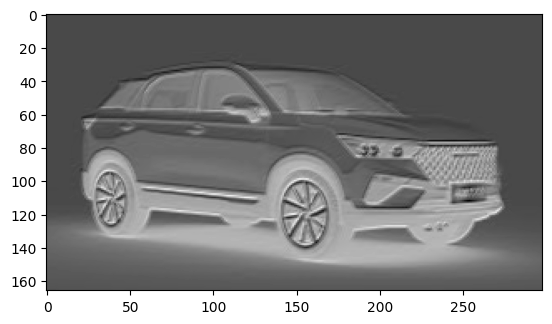

In [15]:
plt.imshow(output_reshaped,cmap="gray")

In [22]:
color_image.shape

(168, 300, 3)

In [27]:
color_iamge_reshaped=color_image.reshape((1,168,300,3))

In [29]:
onv_layer=[tf.keras.layers.Conv2D(
    filters=1,
    kernel_size=(3,3),
    strides=(1,1),
    input_shape=color_iamge_reshaped.shape[1:]

)]

Model=tf.keras.models.Sequential(onv_layer)

In [30]:
Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
output=Model.predict(color_iamge_reshaped)

1/1 [==============================] - 0s 85ms/step


In [32]:
output.shape

(1, 166, 298, 1)

In [34]:
width,height=output.shape[1:-1]

In [35]:
output_reshaped=output.reshape((width,height))

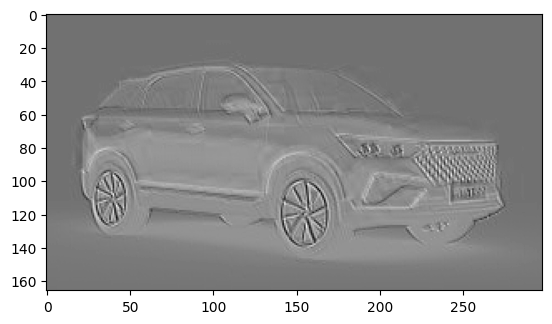

In [36]:
plt.imshow(output_reshaped,cmap="gray")

In [37]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row,col = img.shape
    img = img.reshape(1,row,col,1) # grayscale
    return img
  row,col,depth = img.shape
  color_img = img.reshape(1,row,col,depth) # colored
  return color_img

In [38]:
def max_pooling(img, pool_size=(2,2), strides=(2,2)):
  reshaped_img = reshaping_in(img,grayscale=False)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size, strides=strides)
  result = pooling_layer(reshaped_img)
  return result

In [39]:
result=max_pooling(color_image)

In [40]:
result.shape

TensorShape([1, 84, 150, 3])

In [41]:
def plot(result):
  _,row,col,_=result.shape
  reshaped_img=tf.reshape(result,(row,col,3))
  plt.imshow(reshaped_img)

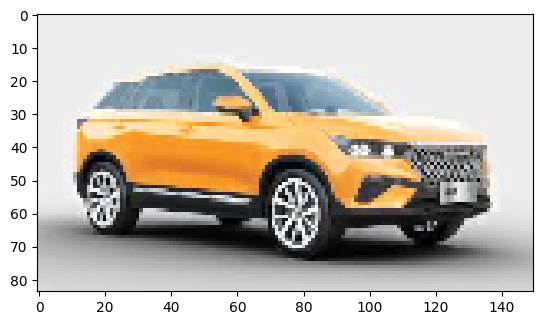

In [42]:
plot(result)

In [43]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row,col = img.shape
    img = img.reshape(1,row,col,1) # grayscale
    return img
  row,col,depth = img.shape
  color_img = img.reshape(1,row,col,depth) # colored
  return color_img

In [44]:
def get_conv_model(filters=1, filter_size=(3,3), strides=(1,1), input_shape=None, padding="valid"):
  CONV_LAYER = [tf.keras.layers.Conv2D(filters=filters,
                                      kernel_size=filter_size,
                                      strides=(1,1),
                                      input_shape=input_shape,
                                      padding=padding)]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model


In [45]:
def apply_conv_model_and_visualize(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    row, col, depth = out.shape[1:]
    reshape_out = out.reshape(row, col, depth)

    for d in range(depth):
      plt.imshow(reshape_out[:,:,d], cmap="gray")
      plt.show()

  except Exception as e:
    raise e

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 166, 298, 10)      280       
                                                                 
Total params: 280 (1.09 KB)
Trainable params: 280 (1.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 70ms/step
(1, 166, 298, 10)


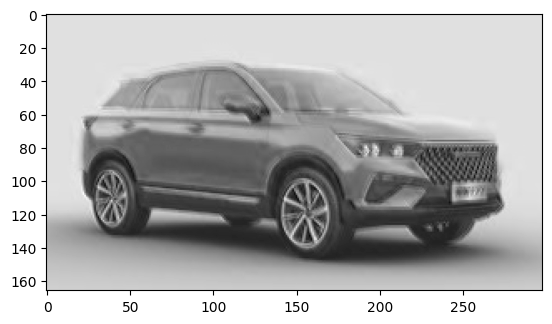

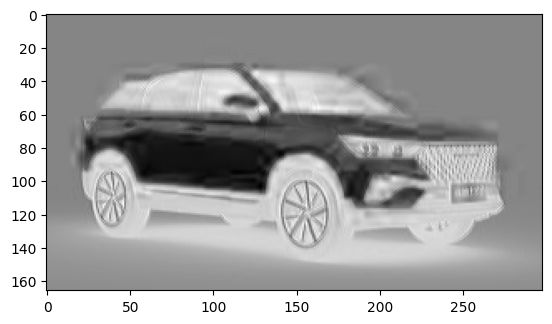

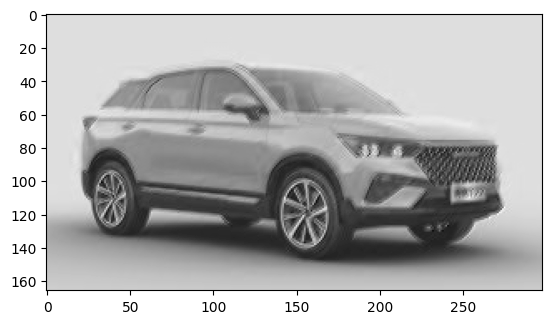

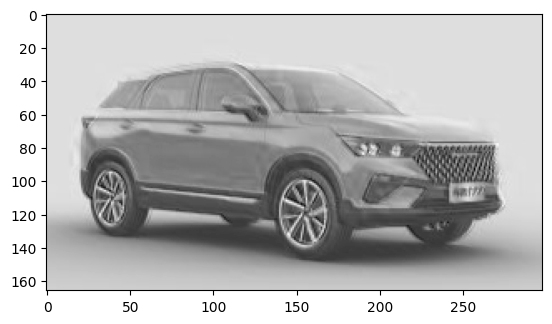

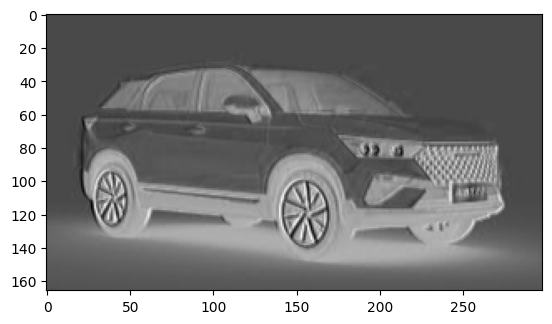

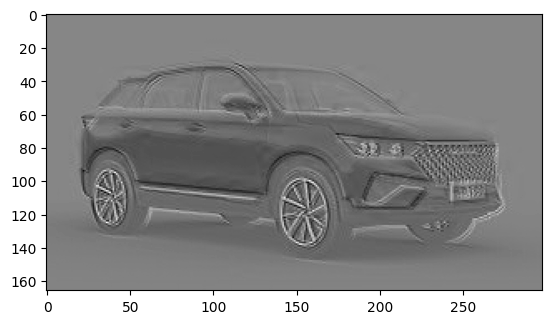

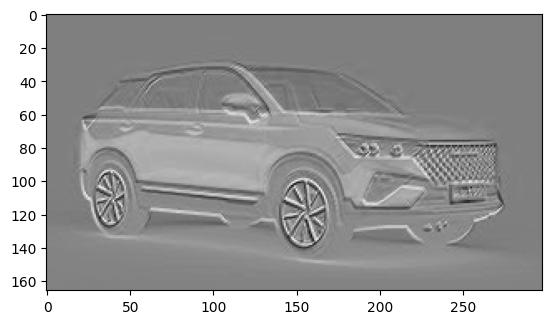

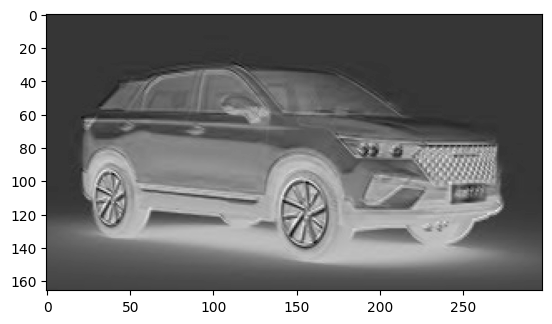

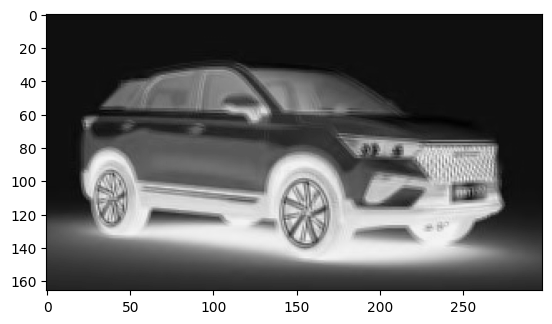

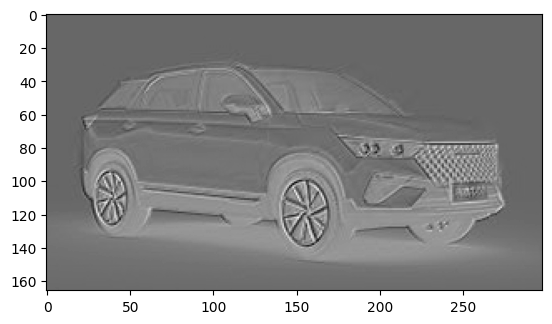

In [46]:
input_img=reshaping_in(color_image,grayscale=False)
model=get_conv_model(filters=10,filter_size=(3,3),strides=(1,1),input_shape=input_img.shape[1:])
apply_conv_model_and_visualize(input_img,model)

In [54]:
!mkdir -p ~/ .kaggle

In [55]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [56]:
!chmod 600 /root/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [53]:
!kaggle datasets download -d salader/dogs-vs-cats

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
